## MATH0058 Computational Methods Assignment 2

Let $A_n$ be the $n\times n$ matrix defined by $a_{jj} =2$ for $1\leq j\leq n$, $a_{j,j-1} =-1$ for $2\leq j \leq n $ and $a_{j,j+1} = - 1$ for $1\leq j\leq n-1$. Hence, $A_n$ is a matrix with the diagonal being constant 2 and the direct upper and lower off-diagonal are constant -1.
Let $\hat{b}_n = [1/n^2, . . . , 1/n^2]^T \in \mathbb{R}^n$. Let $xˆn$ be the vector defined by $(\hat{x}_n)i =i/(n+1),i=1,...,n.$

Using Python solve the system $A_n\hat{y}_n = b_n$ for $n = 20.$ Plot $\hat{y}n$ against $\hat{x}_n$. In the same graphic plot the solution y from part a) evaluated in the points $\hat{x}_n$. Consider the same computation using the modified right handside $\hat{b}_n =[1/(n+1)^2,...,1/(n+1)^2]^T \in \mathbb{R}^n$ and plot the solution in the same graphic.

In [51]:
from scipy.sparse import diags
import numpy as np


n = 20
k = [np.ones(n-1),-2*np.ones(n),np.ones(n-1)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
B_hat = np.array([1/((n+1)**2) for _ in range(n)]).T
X_hat = [i/(n+1) for i in range(n)]

#finding Y
Y_hat = np.dot(B,np.linalg.inv(A))

## Plot

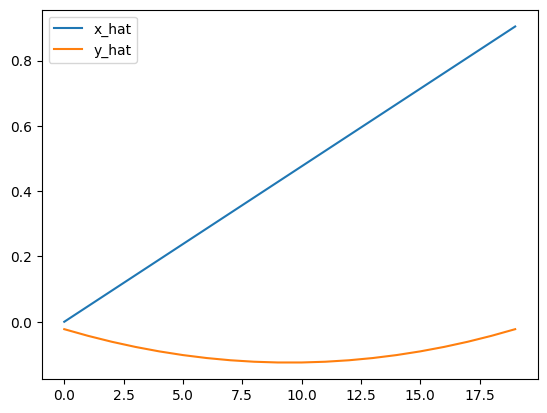

In [52]:
import matplotlib.pyplot as plt

plt.plot(X_hat, label='x_hat')
plt.plot(Y_hat, label='y_hat')

# plt.title('Two Lists')
plt.legend()

plt.show()